In [104]:
import keras as ks
#Preprocessing
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.preprocessing import image
#modeling
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten  
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from sklearn.metrics import confusion_matrix, classification_report


#local file nav
import os
#plotting
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.image import imread
import seaborn as sns

import pandas as pd
import numpy as np

#from sklearn.model_selection import train_test_split

from tqdm import tqdm

#import tensorflow as tf
from cv2 import imread, imshow

np.set_printoptions(threshold=60)

## Data Loading and Preprocessing

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

validate1 = pd.read_csv('validate1.csv')

In [3]:
validate1.shape

(1981, 4)

In [4]:
train_directory = '../text-recognition/train'
test_directory = '../text-recognition/test'
validate_directory = '../text-recognition/validate1'

In [5]:
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_directory,
        color_mode = 'grayscale',
        target_size=(64, 64),
        class_mode = 'categorical', 
        batch_size=11295)

Found 11295 images belonging to 56 classes.


In [20]:
validate_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        validate_directory,
        color_mode = 'grayscale',
        target_size=(64, 64),
        class_mode = 'categorical', 
        batch_size=1981)

Found 1981 images belonging to 56 classes.


In [7]:
test_generator =ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_directory,
        color_mode = 'grayscale',
        target_size=(64, 64),
        class_mode = 'categorical', 
        batch_size=1443)

Found 1443 images belonging to 56 classes.


In [65]:
# STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
# STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
# model.fit_generator(generator=train_generator,
#                     steps_per_epoch=STEP_SIZE_TRAIN,
#                     validation_data=valid_generator,
#                     validation_steps=STEP_SIZE_VALID,
#                     epochs=10

In [23]:
train_data[1].shape

(64, 64, 1)

In [8]:
train_data, train_labels = next(train_generator)
test_data, test_labels = next(test_generator)

In [9]:
print('training: {}'.format(train_data.shape))
#print('training:{}'.format(validate_data.shape))
print('testing: {}'.format(test_data.shape))

training: (11295, 64, 64, 1)
testing: (1443, 64, 64, 1)


In [12]:
print('training labels: {}'.format(train_labels.shape))
#print('validation:{}'.format(validate_data.shape))
print('testing labels: {}'.format(test_labels.shape))



training labels: (11295, 56)
testing labels: (1443, 56)


In [11]:
test_labels.shape

(1443, 56)

## Reshaping

In [13]:
# Reshape the train images 
train_img_unrow = train_data.reshape(11295, -1).T

In [14]:
# Reshape the test images
test_img_unrow = test_data.reshape(1443, -1).T

In [15]:
print(train_img_unrow.shape)
print(test_img_unrow.shape)

(4096, 11295)
(4096, 1443)


In [46]:
train_data.shape

(11295, 64, 64, 1)

In [140]:
train_labels.shape

(11295, 56)

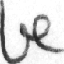

In [19]:
array_to_img(train_data[2])

In [18]:
train_labels[2]
#checking that images line up with classes. 

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.], dtype=float32)

In [145]:
train_generator.class_indices

{'But': 0,
 'Sir': 1,
 'a': 2,
 'all': 3,
 'an': 4,
 'and': 5,
 'are': 6,
 'at': 7,
 'be': 8,
 'been': 9,
 'by': 10,
 'can': 11,
 'for': 12,
 'from': 13,
 'had': 14,
 'has': 15,
 'have': 16,
 'her': 17,
 'his': 18,
 'in': 19,
 'into': 20,
 'is': 21,
 'it': 22,
 'last': 23,
 'made': 24,
 'more': 25,
 'no': 26,
 'not': 27,
 'of': 28,
 'on': 29,
 'one': 30,
 'only': 31,
 'or': 32,
 'our': 33,
 'out': 34,
 'people': 35,
 'said': 36,
 'should': 37,
 'so': 38,
 'talks': 39,
 'than': 40,
 'that': 41,
 'the': 42,
 'their': 43,
 'them': 44,
 'there': 45,
 'this': 46,
 'to': 47,
 'was': 48,
 'were': 49,
 'when': 50,
 'which': 51,
 'who': 52,
 'will': 53,
 'with': 54,
 'would': 55}

In [ ]:
# # as first layer in a sequential model:
# model = Sequential()
# model.add(Dense(32, input_shape=(16,)))
# # now the model will take as input arrays of shape (*, 16)
# # and output arrays of shape (*, 32)

# # after the first layer, you don't need to specify
# # the size of the input anymore:
# model.add(Dense(32))

In [21]:
model = Sequential()
#The first convolution
model.add(Convolution2D(16, (3,3), activation='relu', input_shape=(64, 64, 1)))

model.add(MaxPooling2D(2, 2))

# The second convolution
model.add(Convolution2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

# The third convolution
model.add(Convolution2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

#The fourth convolution
model.add(Convolution2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

# # The fifth convolution
# model.add(Convolution2D(64, (3,3), activation='relu'))
# model.add(MaxPooling2D(2,2))

# # # Flatten the results to feed into a dense layer
model.add(Flatten())
          
# # 128 neuron in the fully-connected layer
model.add(Dense(128, activation='relu'))
          
# 56 output neurons for 56 classes with the softmax activation
model.add(Dense(56, activation='softmax'))


In [22]:
#optimizer
model.compile(loss='categorical_crossentropy',
              optimizer= 'RMSprop',
              metrics=['accuracy'])

In [23]:
train_data.shape

(11295, 64, 64, 1)

In [24]:
train_labels.shape

(11295, 56)

In [25]:
x_val = train_data[:1000]
partial_x_train = train_data[1000:]

y_val = train_labels[:1000]
partial_y_train = train_labels[1000:]

In [ ]:
train_test_split

In [26]:
x_val

array([[[[1.        ],
         [1.        ],
         [1.        ],
         ...,
         [1.        ],
         [1.        ],
         [1.        ]],

        [[0.9568628 ],
         [0.9568628 ],
         [0.9568628 ],
         ...,
         [0.9568628 ],
         [1.        ],
         [1.        ]],

        [[1.        ],
         [1.        ],
         [1.        ],
         ...,
         [0.85098046],
         [0.9568628 ],
         [0.9568628 ]],

        ...,

        [[1.        ],
         [1.        ],
         [1.        ],
         ...,
         [0.6784314 ],
         [0.85098046],
         [0.85098046]],

        [[1.        ],
         [1.        ],
         [1.        ],
         ...,
         [0.49803925],
         [0.6       ],
         [0.6       ]],

        [[0.9568628 ],
         [0.9568628 ],
         [0.9568628 ],
         ...,
         [0.54901963],
         [0.73333335],
         [0.73333335]]],


       [[[1.        ],
         [1.        ],
         [1.  

In [27]:
baseline_fit = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=24,
                    batch_size=50,
                    validation_data=(x_val, y_val))

Train on 10295 samples, validate on 1000 samples
Epoch 1/24
10295/10295 [==============================] - 27s 3ms/step - loss: 2.9123 - accuracy: 0.2920 - val_loss: 2.3564 - val_accuracy: 0.4100
Epoch 2/24
10295/10295 [==============================] - 28s 3ms/step - loss: 1.6919 - accuracy: 0.5484 - val_loss: 1.3631 - val_accuracy: 0.6100
Epoch 3/24
10295/10295 [==============================] - 32s 3ms/step - loss: 1.2014 - accuracy: 0.6573 - val_loss: 1.1056 - val_accuracy: 0.6670
Epoch 4/24
10295/10295 [==============================] - 29s 3ms/step - loss: 0.9408 - accuracy: 0.7256 - val_loss: 0.9651 - val_accuracy: 0.7000
Epoch 5/24
10295/10295 [==============================] - 29s 3ms/step - loss: 0.7565 - accuracy: 0.7773 - val_loss: 0.8844 - val_accuracy: 0.7330
Epoch 6/24
10295/10295 [==============================] - 28s 3ms/step - loss: 0.6117 - accuracy: 0.8164 - val_loss: 1.2219 - val_accuracy: 0.6840
Epoch 7/24
10295/10295 [==============================] - 30s 3ms/ste

In [63]:
partial_x_train.shape

(10295, 64, 64, 1)

In [55]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 62, 62, 16)        160       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 4, 4, 64)         

In [35]:
score = model.evaluate(x_val, y_val)

1000/1000 [==============================] - 1s 700us/step


In [39]:
score

[0.9606979368627071, 0.8519999980926514]

In [43]:
pred_test = model.predict(test_data)

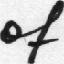

In [53]:
array_to_img(test_data[0])

In [54]:
test_data[0].shape

(64, 64, 1)

In [47]:
baseline_fit.history

{'val_loss': [2.356389707326889,
  1.363071122765541,
  1.1055592447519302,
  0.9650853157043457,
  0.8844180196523667,
  1.2218548595905303,
  0.6542632475495338,
  1.3638073801994324,
  0.6416590228676796,
  0.7535524904727936,
  0.6692434653639794,
  0.6906569108366967,
  0.6410665795207023,
  0.6432450369000435,
  0.7282631076872349,
  0.7572430774569512,
  0.8259508445858955,
  0.8395433977246285,
  0.913739162683487,
  0.922955134510994,
  0.952133309841156,
  0.9389439016580582,
  1.0164378851652145,
  0.9606979742646218],
 'val_accuracy': [0.4099999964237213,
  0.6100000143051147,
  0.6669999957084656,
  0.699999988079071,
  0.7329999804496765,
  0.6840000152587891,
  0.8080000281333923,
  0.6079999804496765,
  0.8029999732971191,
  0.7739999890327454,
  0.8209999799728394,
  0.8259999752044678,
  0.8399999737739563,
  0.8399999737739563,
  0.8379999995231628,
  0.8420000076293945,
  0.8349999785423279,
  0.8429999947547913,
  0.8379999995231628,
  0.8339999914169312,
  0.84299

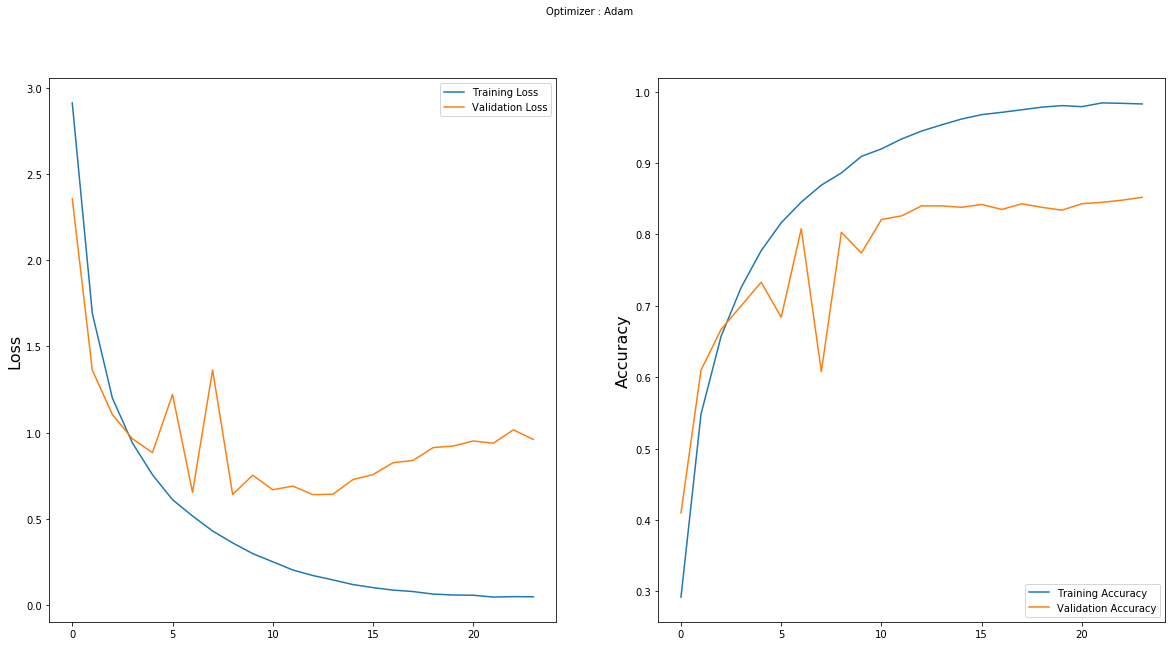

In [50]:

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : RMSProp', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(baseline_fit.history['loss'], label='Training Loss')
plt.plot(baseline_fit.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(baseline_fit.history['accuracy'], label='Training Accuracy')
plt.plot(baseline_fit.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [108]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(baseline_fit, support = True)

visualizer.fit(partial_x_train, partial_y_train)        # Fit the visualizer and the model
visualizer.score(x_val, y_val)        # Evaluate the model on the test data
visualizer.show()    

YellowbrickTypeError: This estimator is not a classifier; try a regression or clustering score visualizer instead!

## View model predictions

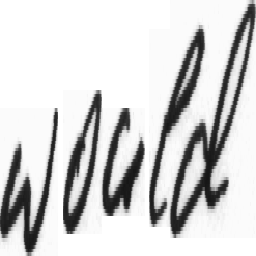

In [94]:
test_image = image.load_img('../text-recognition/test/would/g03-000-02-04.png',
                            target_size = (256, 256, 1))
# test_image = image.img_to_array(test_image)
# # test_image = np.expand_dims(test_image, axis = 0)
# #result = model.predict(test_image)
# # training_set.class_indices
# # result

test_image
                           

In [100]:
generator_size_test = ImageDataGenerator(rescale=1./255).flow_from_directory('../text-recognition/test/it',
        color_mode = 'grayscale',
        target_size=(64, 64),
        #class_mode = 'categorical', 
        batch_size=11295)

Found 1 images belonging to 1 classes.


In [103]:
generator_size_test

In [ ]:
#Try transfer learning with VGG16 model? 
#conv_base
#add dropout? 